This notebook loads the dataframe as processed in the 'mvp_nlp_sentimentanalysis.ipynb' and creates a series of word clouds illustrating the trends amongst them.

> Takeaway message / recommendations: 
1. Leverage the use of the word "Space." Space is commonly found within the discourse, but in congruence with other words will add significance.
2. Partner and collaborate with current industry leaders. Institutions like NASA and SpaceX not only have scientific headway, but they have built reputations, high esteem, and clout. Partnering with organizations of this scale will grow positive marketing schemes.
3. Evoke emotion. The power building an emotional response adds tremendous value to your marketing capabilities. Customers think with their hearts, and by utilizing words like “love,” you are likely to create a positive sentiment around your product.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stop = stopwords.words('english')

from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /Users/tlipman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tlipman/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tlipman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pd.set_option('display.width', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', 200)

In [3]:
df = pd.read_csv('final_df')
df.shape

(216009, 12)

In [4]:
df.head()

,Unnamed: 0,favorite_count,repost_count,text,id,polarity,pol,neg,neu,pos,sil,cluster
0,0,2.0,0.0,rebel editor give give perseverance patience self awareness trusting intuition ect 2 3,66218,0.000000,"{'neg': 0.105, 'neu': 0.719, 'pos': 0.176, 'compound': 0.2732}",0.105,0.719,0.176,-0.020983,4
1,1,0.0,0.0,starlinks latent china crisis could spark whole new world warcraft infosec infosec,267611,0.168182,"{'neg': 0.256, 'neu': 0.625, 'pos': 0.119, 'compound': -0.4939}",0.256,0.625,0.119,-0.010661,2
2,2,0.0,1.0,littlebitprince added atom day adding right go try catch dot ada sol hold,307032,0.285714,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.005932,1
3,3,0.0,0.0,databourg march 9 1934 birth soviet air force pilot cosmonaut yuri gagarin march 27 1968 fi,255943,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,-0.012864,2
4,4,0.0,1.0,daphnedark1 mar star mind diena08950191 sadly still stick time time wasted wa suppose buildin,282555,-0.350000,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.7184}",0.333,0.667,0.000,0.006299,1


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,favorite_count,repost_count,text,id,polarity,pol,neg,neu,pos,sil,cluster
0,2.0,0.0,rebel editor give give perseverance patience self awareness trusting intuition ect 2 3,66218,0.000000,"{'neg': 0.105, 'neu': 0.719, 'pos': 0.176, 'compound': 0.2732}",0.105,0.719,0.176,-0.020983,4
1,0.0,0.0,starlinks latent china crisis could spark whole new world warcraft infosec infosec,267611,0.168182,"{'neg': 0.256, 'neu': 0.625, 'pos': 0.119, 'compound': -0.4939}",0.256,0.625,0.119,-0.010661,2
2,0.0,1.0,littlebitprince added atom day adding right go try catch dot ada sol hold,307032,0.285714,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.005932,1
3,0.0,0.0,databourg march 9 1934 birth soviet air force pilot cosmonaut yuri gagarin march 27 1968 fi,255943,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,-0.012864,2
4,0.0,1.0,daphnedark1 mar star mind diena08950191 sadly still stick time time wasted wa suppose buildin,282555,-0.350000,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.7184}",0.333,0.667,0.000,0.006299,1


In [7]:
df.isnull().sum() # confirming no null values

favorite_count    0
repost_count      0
text              0
id                0
polarity          0
pol               0
neg               0
neu               0
pos               0
sil               0
cluster           0
dtype: int64

## Word Clouds

In [8]:
pd.value_counts(df.cluster)

2    104527
4     65686
1     35282
0      8836
3      1678
Name: cluster, dtype: int64

In [9]:
# creating multiple dataframes with clusters
unique_clusters = df['cluster'].unique()
cluster_4 = df.loc[df['cluster'] == unique_clusters[0]]
cluster_2 = df.loc[df['cluster'] == unique_clusters[1]]
cluster_1 = df.loc[df['cluster'] == unique_clusters[2]]
cluster_0 = df.loc[df['cluster'] == unique_clusters[3]]
cluster_3 = df.loc[df['cluster'] == unique_clusters[4]]

In [10]:
word_counts_0 = ' '.join(cluster_0['text'].tolist())
word_counts_1 = ' '.join(cluster_1['text'].tolist())
word_counts_2 = ' '.join(cluster_2['text'].tolist())
word_counts_3 = ' '.join(cluster_3['text'].tolist())
word_counts_4 = ' '.join(cluster_4['text'].tolist())

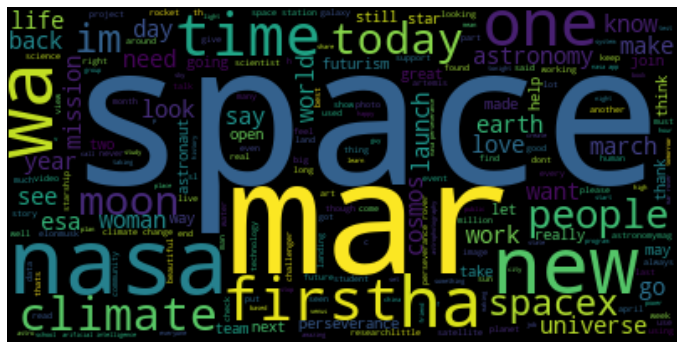

In [11]:
# CLUSTER 0
wordcloud = WordCloud().generate(word_counts_0)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

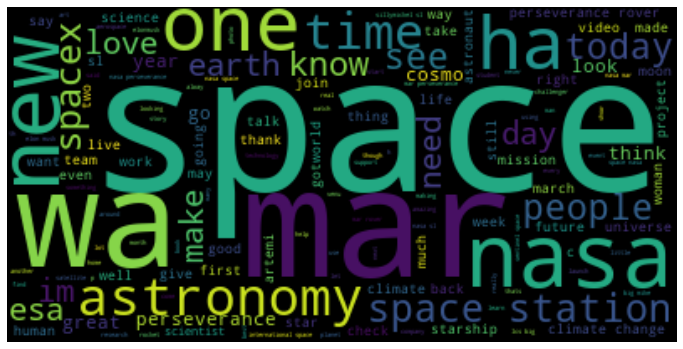

In [12]:
# CLUSTER 1
wordcloud = WordCloud().generate(word_counts_1)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

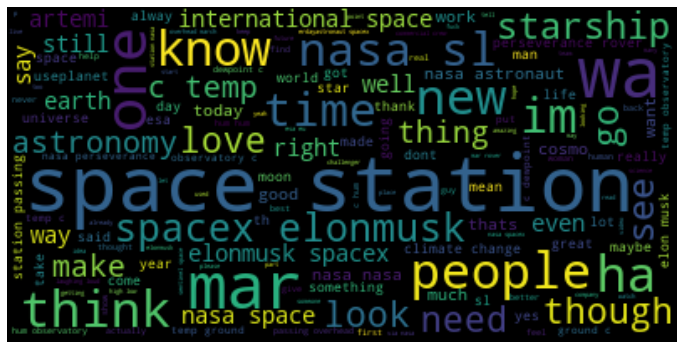

In [13]:
# CLUSTER 2
wordcloud = WordCloud().generate(word_counts_2)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

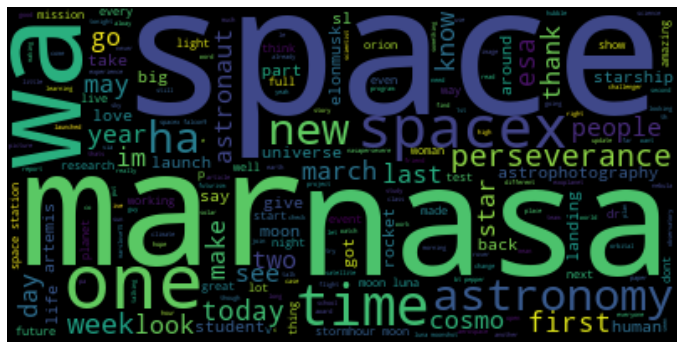

In [14]:
# CLUSTER 3
wordcloud = WordCloud().generate(word_counts_3)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

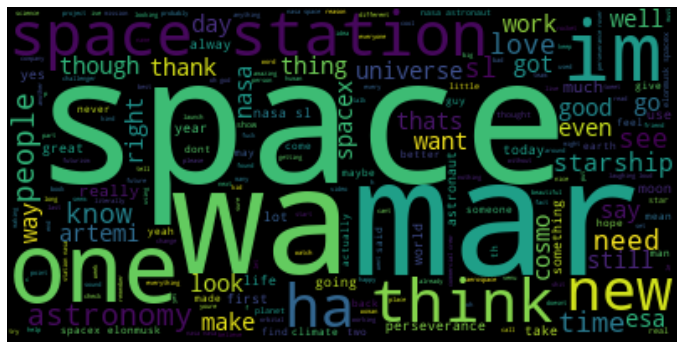

In [15]:
# CLUSTER 4
wordcloud = WordCloud().generate(word_counts_4)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Term Frequency-Inverse Document Frequency

In [16]:
#function that calculates the inverse document frequency(IDF) of each word in our collection
def get_idf(class_, dataframe, stopwords_list):
    docs = dataframe[dataframe.cluster==class_].text
    class_dict = {} 
    for doc in docs:
        words = set(doc.split())
        for word in words:
            if word.lower() not in stopwords_list: 
                class_dict[word.lower()] = class_dict.get(word.lower(), 0) + 1
    idf_df = pd.DataFrame.from_dict(class_dict, orient='index')
    idf_df.columns = ['IDF']
    idf_df.IDF = np.log(len(docs)/idf_df.IDF)
    idf_df = idf_df.sort_values(by="IDF", ascending=True)
    return idf_df.head(40)

In [17]:
for i in range(5):
    print(get_idf(i , df, stop))

                   IDF
space         1.895914
mar           2.320398
nasa          2.331985
ha            2.979567
wa            3.006656
new           3.015852
climate       3.065566
perseverance  3.146418
first         3.149053
one           3.170388
time          3.231518
like          3.287497
year          3.290532
spacex        3.379479
today         3.458968
2             3.510640
people        3.537513
get           3.644172
esa           3.648510
day           3.674944
im            3.688427
1             3.692962
moon          3.739482
rover         3.753871
astronomy     3.753871
image         3.763580
starship      3.768470
launch        3.768470
see           3.788272
need          3.818731
earth         3.834316
work          3.844843
make          3.860843
know          3.871654
universe      3.871654
3             3.899204
march         3.904806
world         3.927534
life          3.939095
go            3.974602
                   IDF
space         1.874200
nasa       